In [13]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parcial III - Métodos Computacionales

### Nombre: Candy Valentina López Villanueva

---

## ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


---

# 1

(**35 puntos**) El **método de Jacobi** es un algoritmo iterativo para resolver sistemas lineales de la forma:

$$
A \mathbf{x} = \mathbf{b},
$$

donde \$A\$ es una matriz cuadrada no singular. A diferencia del método de Gauss-Seidel, Jacobi utiliza exclusivamente los valores de la iteración anterior para actualizar todas las variables simultáneamente, lo que lo hace más sencillo de paralelizar pero, en general, con una convergencia más lenta.

## Algoritmo

Dado un sistema lineal \$A \mathbf{x} = \mathbf{b}\$, el método de Jacobi consiste en:

1. Elegir un vector inicial \$\mathbf{x}^{(0)}\$ (por ejemplo, el vector nulo).

2. Para cada iteración \$k\$ y cada componente \$i = 1, 2, ..., n\$, actualizar:

$$
x_i^{(k)} = \frac{1}{a_{ii}} \left( b_i - \sum_{\substack{j=1 \\ j \neq i}}^{n} a_{ij} x_j^{(k-1)} \right)
$$

3. Repetir hasta que se cumpla un criterio de convergencia, como:

$$
\| \mathbf{x}^{(k)} - \mathbf{x}^{(k-1)} \| < \text{tolerancia}
$$

---

**a)** Escriba una función llamada `jacobi` que resuelva el sistema lineal \$A \mathbf{x} = \mathbf{b}\$ usando el método iterativo de Jacobi. La función debe aceptar como argumentos:

* La matriz \$A\$ y el vector \$\mathbf{b}\$,
* Una tolerancia (por defecto \$1\times 10^{-10}\$),
* Un número máximo de iteraciones.

Debe retornar la solución aproximada \$\mathbf{x}\$ y el número de iteraciones realizadas.

---

**b)** Aplique su función para resolver el siguiente sistema de ecuaciones lineales:

$$
\begin{cases}
10x_1 - x_2 + 2x_3 = 6 \\[2mm]
-2x_1 + 11x_2 - x_4 = 25 \\[2mm]
3x_1 - x_2 + 10x_3 - x_4 = -11 \\[2mm]
2x_2 - x_3 + 8x_4 = 15
\end{cases}
$$

Use como vector inicial \$\mathbf{x}^{(0)} = \[0, 0, 0, 0]^T\$. Imprima la solución aproximada y el número de iteraciones necesarias para adquirir la convergencia.

---

**c)** Compare su solución con `np.linalg.solve`. ¿Qué tan cercana es la solución iterativa a la exacta? Para esto, realice un gráfico del error usando la norma euclidiana (`np.linalg.norm`) en función de la tolerancia y otro del número de iteraciones, empleando un `np.logspace(-18, -1, 18)`.

---



Solución Jacobi: [ 1.06736509  2.56693873 -1.05335607  1.10159581]
Iteraciones: 21
Solución exacta: [ 1.06736509  2.56693873 -1.05335607  1.10159581]
Error final: 1.865043222895112e-11


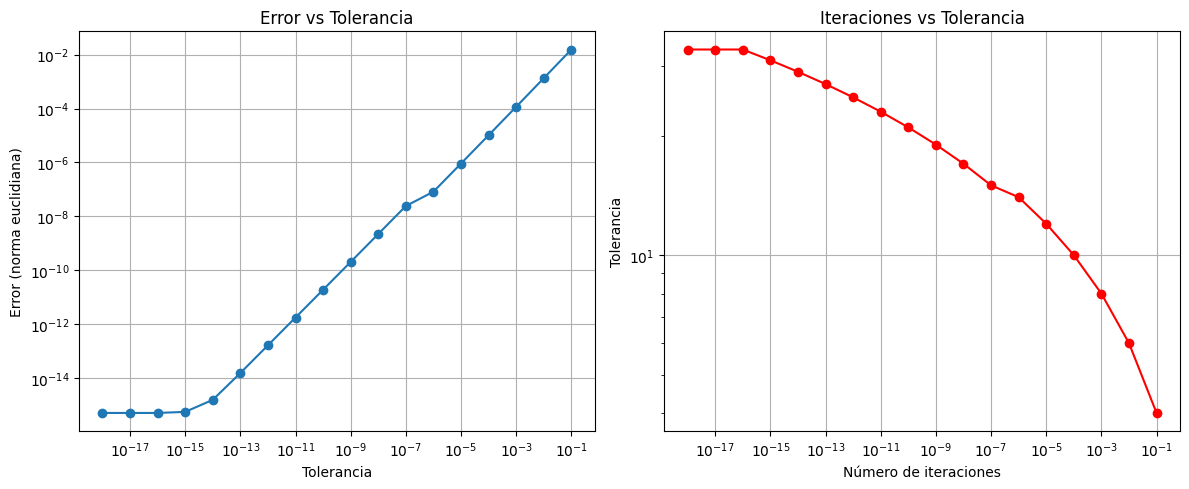

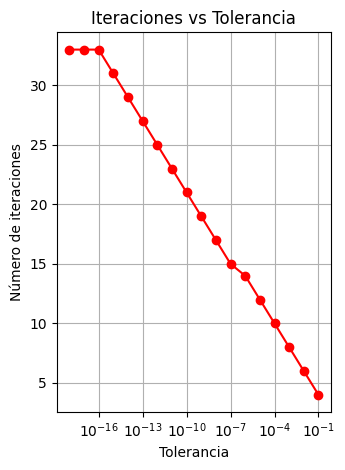

In [14]:
# Aquí va su código

import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

def jacobi(A, b, tol=1e-10, max_iter=500):
    """
    Resuelve un sistema lineal Ax = b usando el método iterativo de Jacobi.

    Parámetros
    A : numpy.ndarray
        Matriz cuadrada no singular de dimensiones (n, n).
    b : numpy.ndarray
        Vector de términos independientes de dimensiones (n,).
    tol : float, opcional
        Tolerancia para el criterio de convergencia. El valor por defecto es 1e-10.
    max_iter : int, opcional
        Número máximo de iteraciones permitidas. Por defecto es 500.

    Retorna
    x : numpy.ndarray
        Solución aproximada al sistema.
    k : int
        Número de iteraciones realizadas.
    errores : list
        Lista de errores (norma euclidiana entre iteraciones) por paso.
    """
    n = A.shape[0]
    x = np.zeros(n)  # Vector inicial x^(0)
    errores = []

    # Precalcular la matriz diagonal inversa
    D_inv = 1 / np.diag(A)

    for k in range(1, max_iter + 1):
        x_new = np.zeros_like(x)

        # Fórmula de Jacobi para cada componente i
        for i in range(n):
            suma = np.dot(A[i, :], x) - A[i, i] * x[i]
            x_new[i] = D_inv[i] * (b[i] - suma)

        # Calcular error y verificar convergencia
        error = la.norm(x_new - x)
        errores.append(error)
        if error < tol:
            return x_new, k, errores

        x = x_new

    # Si llega aquí es que no convergió en max_iter
    return x, k, errores


# b) Aplicar al sistema dado
A = np.array([[10, -1,  2,  0],
              [-2, 11,  0, -1],
              [ 3, -1, 10, -1],
              [ 0,  2, -1,  8]], dtype=float)

b = np.array([6, 25, -11, 15], dtype=float)
x0 = np.zeros(4)

# Resolver con Jacobi
x_jacobi, iteraciones, errores = jacobi(A, b, tol=1e-10, max_iter=500)

print("Solución Jacobi:", x_jacobi)
print("Iteraciones:", iteraciones)

# c) Comparar con solución exacta
x_exacta = la.solve(A, b)
print("Solución exacta:", x_exacta)

# Error final entre la solución Jacobi y la exacta
error_final = la.norm(x_jacobi - x_exacta)
print("Error final:", error_final)

# Graficar error y número de iteraciones para distintas tolerancias
tolerancias = np.logspace(-18, -1, 18)
errores_tol = []
iters_tol = []

for tol in tolerancias:
    x_aprox, iters, _ = jacobi(A, b, tol=tol, max_iter=500)
    iters_tol.append(iters)
    error_con_tol = la.norm(x_aprox - x_exacta)
    errores_tol.append(error_con_tol)

plt.figure(figsize=(12,5))

# Gráfico del error
plt.subplot(1, 2, 1)
plt.loglog(tolerancias, errores_tol, marker='o')
plt.xlabel("Tolerancia")
plt.ylabel("Error (norma euclidiana)")
plt.title("Error vs Tolerancia")
plt.grid(True)

# Gráfico del número de iteraciones (Escala Log Log)
plt.subplot(1, 2, 2)
plt.loglog(tolerancias, iters_tol, marker='o', color='r')
plt.xlabel("Número de iteraciones")
plt.ylabel("Tolerancia")
plt.title("Iteraciones vs Tolerancia")
plt.grid(True)

plt.tight_layout()
plt.show()

# Gráfico del número de iteraciones (Escala Semilog)
plt.subplot(1, 2, 2)
plt.semilogx(tolerancias, iters_tol, marker='o', color='r')
plt.xlabel("Tolerancia")
plt.ylabel("Número de iteraciones")
plt.title("Iteraciones vs Tolerancia")
plt.grid(True)

plt.tight_layout()
plt.show()

**¿Qué tan cercana es la solución iterativa a la exacta?:**

El método de Jacobi alcanzó la convergencia en 21 iteraciones para una tolerancia de $1\times 10^{-10}$, obteniendo una solución idéntica a la calculada mediante np.linalg.solve. El error final entre ambas soluciones es del orden de $10^{-11}$, lo cual confirma la validez de la implementación y la precisión del método en este caso.

# 2

(**50 puntos**) El sistema **masa-resorte con fricción** es un modelo clásico en física que describe el movimiento de una masa sujeta a una fuerza restauradora (resorte) y una fuerza disipativa (fricción o viscosidad). Su dinámica está gobernada por la ecuación diferencial de segundo orden:

$$
m y''(t) + c y'(t) + k y(t) = 0,
$$

donde:

* $m$ es la masa del objeto,
* $c$ es el coeficiente de fricción (amortiguamiento),
* $k$ es la constante del resorte,
* $y(t)$ es la posición de la masa respecto a su equilibrio.

---

**a)** Reformule esta ecuación como un sistema de primer orden adecuado para ser resuelto con `solve_ivp`. Explique mediante una función explicita y realice su documentación.

---

**b)** Considere el siguiente caso:

* Masa: $m = 1$ kg
* Constante del resorte: $k = 4$ N/m
* Coeficiente de fricción: $c = 0.5$ N·s/m
* Condiciones iniciales: $y(0) = 1$, $y'(0) = 0$
* Intervalo de tiempo: $t \in [0, 20]$

Utilice `solve_ivp` para resolver el sistema y grafique $y(t)$ como $y'(t)$. Interprete el comportamiento del sistema.

---

**c)** Simule dos escenarios adicionales:

1. Sin fricción: $c = 0$
2. Con fuerte fricción: $c = 4.5$

Grafique los tres casos \$y(t)\$ en una misma figura y compare los regímenes: **no amortiguado**, **subamortiguado**, y **sobreamortiguado**.

---

**d)** Para cada uno de los tres casos, calcule la **energía mecánica total** del sistema en función del tiempo. La energía total se define como la suma de energía cinética y potencial:

$$
E(t) = \frac{1}{2} m v^2 + \frac{1}{2} k y^2
$$

Grafique $E(t)$ para los tres escenarios simulados. Analice y compare el comportamiento de la energía en cada caso. ¿Qué sucede con la energía a lo largo del tiempo? ¿Cómo se relaciona esto con el valor del coeficiente de fricción $c$?


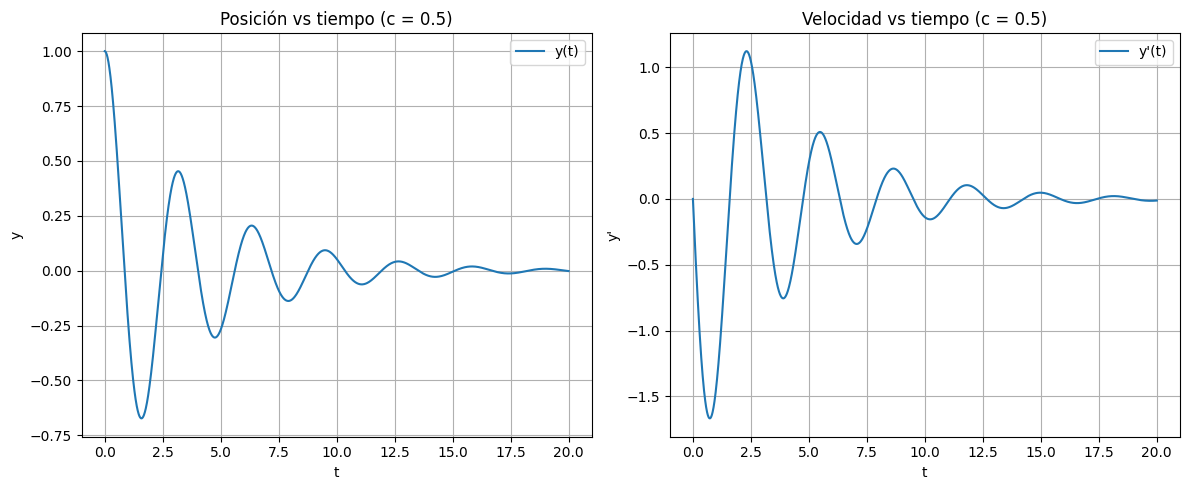

Interpretación (b): con c=0.5, el sistema es subamortiguado (c < 2*sqrt(m*k)=4).
Se observan oscilaciones cuya envolvente decae exponencialmente por la fricción.


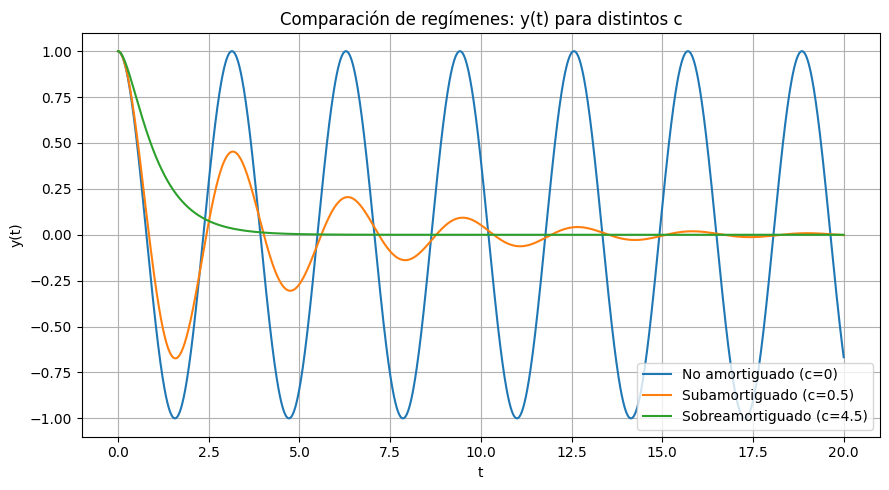

Comparación (c):
- c=0: oscilación sinusoidal de amplitud constante (frecuencia ω=√(k/m)=2 rad/s).
- c=0.5: subamortiguado, oscilaciones con amplitud decreciente.
- c=4.5: sobreamortiguado, no hay oscilaciones; retorno monótono al equilibrio.


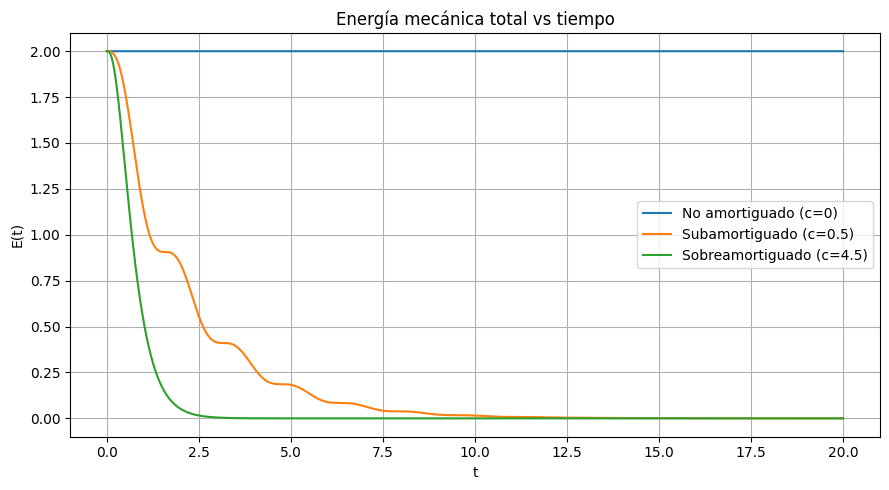

Análisis (d):
- c=0 (no amortiguado): E(t) se mantiene constante (conservación de energía mecánica).
- c=0.5 (subamortiguado): E(t) decrece gradualmente; la fricción disipa energía en calor.
- c=4.5 (sobreamortiguado): E(t) decae más rápido debido al amortiguamiento fuerte.
La tasa de decrecimiento de E(t) aumenta con c, reflejando mayor disipación.


In [15]:
# Aquí va su código
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# a) Formulación en primer orden
def amortiguacion_masa_resorte(t, z, m, c, k):
    """
    Sistema masa-resorte con fricción en forma de primer orden.

    Reformula la EDO de segundo orden:
        m y'' + c y' + k y = 0
    como un sistema de primer orden en el estado z = [y, v]:
        y' = v
        v' = -(c/m) v - (k/m) y

    Parámetros
    t : float
        Tiempo (variable independiente). No se usa explícitamente
        porque el sistema es autónomo, pero `solve_ivp` lo requiere.
    z : array_like de longitud 2
        Estado del sistema [y, v], donde y es posición y v = y' es velocidad.
    m : float
        Masa (> 0).
    c : float
        Coeficiente de fricción (amortiguamiento) (>= 0 típicamente).
    k : float
        Constante del resorte (> 0).

    Retorna
    dzdt : list de float
        Derivadas del estado [y', v'] en el tiempo t.
    """
    y, v = z
    dydt = v
    dvdt = -(c/m) * v - (k/m) * y
    return [dydt, dvdt]


def simular_masa_resorte(m, c, k, y0, v0, t_span, t_eval=None, rtol=1e-9, atol=1e-12):
    """
    Resuelve el sistema masa-resorte con fricción usando solve_ivp.

    Parámetros
    m : float
        Masa.
    c : float
        Coeficiente de fricción.
    k : float
        Constante del resorte.
    y0 : float
        Posición inicial y(0).
    v0 : float
        Velocidad inicial y'(0).
    t_span : tuple(float, float)
        Intervalo de integración (t0, tf).
    t_eval : array_like o None, opcional
        Puntos de tiempo donde evaluar la solución. Si es None, se genera
        un arreglo uniforme de 1000 puntos.
    rtol, atol : float, opcional
        Tolerancias relativas y absolutas para el integrador.

    Retorna
    sol : OdeSolution (objeto de solve_ivp)
        Contiene tiempos, estados y metadatos de la integración.
    """
    if t_eval is None:
        t_eval = np.linspace(t_span[0], t_span[1], 1000)

    z0 = [y0, v0]
    sol = solve_ivp(
        fun=lambda t, z: amortiguacion_masa_resorte(t, z, m, c, k),
        t_span=t_span,
        y0=z0,
        t_eval=t_eval,
        rtol=rtol,
        atol=atol,
        vectorized=False
    )
    return sol


def energia_mecanica(m, k, y, v):
    """
    Calcula la energía mecánica total E(t) = T + V para el sistema
    masa-resorte (sin incluir pérdidas por fricción en la forma de energía).

    Parámetros
    m : float
        Masa.
    k : float
        Constante del resorte.
    y : array_like
        Posición(es) y(t).
    v : array_like
        Velocidad(es) v(t) = y'(t).

    Retorna
    E : ndarray
        Energía mecánica total en cada instante: 0.5*m*v^2 + 0.5*k*y^2
    """
    y = np.asarray(y)
    v = np.asarray(v)
    return 0.5 * m * v**2 + 0.5 * k * y**2

# b) Caso base: m=1, k=4, c=0.5, y(0)=1, y'(0)=0, t in [0, 20]
m = 1.0
k = 4.0
c_base = 0.5
y0, v0 = 1.0, 0.0
t_span = (0.0, 20.0)
t_eval = np.linspace(t_span[0], t_span[1], 2000)

sol_base = simular_masa_resorte(m, c_base, k, y0, v0, t_span, t_eval=t_eval)

# Extraer posición y velocidad
y_base = sol_base.y[0]
v_base = sol_base.y[1]
t = sol_base.t

# Gráficas para (b): y(t) y v(t)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(t, y_base, label='y(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Posición vs tiempo (c = 0.5)')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(t, v_base, label="y'(t)")
plt.xlabel('t')
plt.ylabel("y'")
plt.title('Velocidad vs tiempo (c = 0.5)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Interpretación breve (texto para el informe):
print("Interpretación (b): con c=0.5, el sistema es subamortiguado (c < 2*sqrt(m*k)=4).")
print("Se observan oscilaciones cuya envolvente decae exponencialmente por la fricción.")

# c) Tres escenarios: c=0 (no amortiguado), c=0.5 (subamortiguado), c=4.5 (sobreamortiguado)
casos = {
    'No amortiguado (c=0)': 0.0,
    'Subamortiguado (c=0.5)': 0.5,
    'Sobreamortiguado (c=4.5)': 4.5
}

soluciones = {}
for label, c_val in casos.items():
    soluciones[label] = simular_masa_resorte(m, c_val, k, y0, v0, t_span, t_eval=t_eval)

plt.figure(figsize=(9,5))
for label, sol in soluciones.items():
    plt.plot(sol.t, sol.y[0], label=label)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparación de regímenes: y(t) para distintos c')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Comparación (c):")
print("- c=0: oscilación sinusoidal de amplitud constante (frecuencia ω=√(k/m)=2 rad/s).")
print("- c=0.5: subamortiguado, oscilaciones con amplitud decreciente.")
print("- c=4.5: sobreamortiguado, no hay oscilaciones; retorno monótono al equilibrio.")


# d) Energía mecánica total E(t) para los tres casos
plt.figure(figsize=(9,5))
for label, sol in soluciones.items():
    y = sol.y[0]
    v = sol.y[1]
    E = energia_mecanica(m, k, y, v)
    plt.plot(sol.t, E, label=label)

plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Energía mecánica total vs tiempo')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Análisis energético:
print("Análisis (d):")
print("- c=0 (no amortiguado): E(t) se mantiene constante (conservación de energía mecánica).")
print("- c=0.5 (subamortiguado): E(t) decrece gradualmente; la fricción disipa energía en calor.")
print("- c=4.5 (sobreamortiguado): E(t) decae más rápido debido al amortiguamiento fuerte.")
print("La tasa de decrecimiento de E(t) aumenta con c, reflejando mayor disipación.")

**d.) ¿Qué sucede con la energía a lo largo del tiempo? ¿Cómo se relaciona esto con el valor del coeficiente de fricción $c$?:**

***Análisis de la energía mecánica en función del coeficiente de fricción $(c)$***

- **Sin fricción** $(c = 0)$:  
  La energía mecánica total  
  
  $E(t) = \frac12 m v^2 + \frac12 k y^2$
  
  se **conserva** y permanece **constante** en el tiempo.

- **Con fricción** $(c > 0)$:  
  $(E(t))$ **disminuye monótonamente** y tiende a **cero** cuando $(t \to \infty)$.

  Esto se demuestra derivando la energía:  
  
  $\frac{dE}{dt} = m v v' + k y y' = v \,(m v' + k y)$
  
  Usando la ecuación de movimiento $(m v' = -c v - k y)$, se obtiene:  
  
  $\frac{dE}{dt} = -\,c\,v^2 \le 0$
  
  La fricción **siempre extrae energía** del sistema a una tasa proporcional a $(c)$ y al cuadrado de la velocidad.

- **Relación con $(c)$**:  
  A mayor $(c)$:
  - **Más rápida** disipación de energía.
  - La energía decae más rápido hacia cero.

#### Resumen de los tres casos:
- $(c = 0)$: Energía **constante** (no amortiguado).  
- $(c = 0.5)$: Energía **decrece gradualmente** (subamortiguado, con oscilaciones cuya envolvente decrece).  
- $(c = 4.5)$: Energía **cae rápidamente, sin oscilaciones** (sobreamortiguado).

> **Nota:** En régimen débilmente amortiguado, la amplitud decae como $(e^{-\frac{c}{2m}t})$, por lo que la energía (proporcional al cuadrado de la amplitud) decae aproximadamente como $(e^{-\frac{c}{m}t})$. Esto conecta la rapidez de pérdida de energía directamente con el valor de $(c)$.

# 3

**(15 puntos)** Sea $A$ una matriz cuadrada de tamaño $n \times n$. Dos propiedades fundamentales de los autovalores de $A$ son:

1. **Determinante**:

   $$
   \det(A) = \prod_{i=1}^{n} \lambda_i
   $$

2. **Traza**:

   $$
   \mathrm{tr}(A) = \sum_{i=1}^{n} \lambda_i
   $$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando un conjunto de matrices aleatorias $A$ de $5\times 5$ (1000 matrices diferentes), verifique numéricamente ambas propiedades. Puede emplear las funciones `np.linalg.det`, `np.trace` y `np.linalg.eigvals`.


In [16]:
# Aquí va su código
import numpy as np

def verificar_propiedades_autovalores(num_matrices=1000, n=5, tol=1e-8):
    """
    Verifica numéricamente las propiedades del determinante y la traza
    en función de los autovalores para matrices aleatorias.

    Parámetros
    num_matrices : int
        Número de matrices aleatorias a generar.
    n : int
        Tamaño de cada matriz cuadrada.
    tol : float
        Tolerancia numérica para considerar dos valores como iguales.

    Retorna
    None
        Imprime el error máximo encontrado en ambas propiedades.
    """
    errores_det = []
    errores_traza = []

    for _ in range(num_matrices):
        # Generar matriz aleatoria con valores en [-1, 1]
        A = np.random.uniform(-1, 1, size=(n, n))

        # Calcular determinante y traza directamente
        det_directo = np.linalg.det(A)
        traza_directa = np.trace(A)

        # Calcular autovalores
        autovalores = np.linalg.eigvals(A)

        # Propiedades desde autovalores
        det_product = np.prod(autovalores)
        traza_sum = np.sum(autovalores)

        # Errores
        errores_det.append(abs(det_directo - det_product))
        errores_traza.append(abs(traza_directa - traza_sum))

    print(f"Error máximo en determinante: {max(errores_det):.2e}")
    print(f"Error máximo en traza: {max(errores_traza):.2e}")
    print(f"¿Cumplen ambas propiedades dentro de la tolerancia {tol}?")
    print(f"Determinante: {max(errores_det) < tol}")
    print(f"Traza: {max(errores_traza) < tol}")

verificar_propiedades_autovalores()

Error máximo en determinante: 1.60e-14
Error máximo en traza: 7.22e-15
¿Cumplen ambas propiedades dentro de la tolerancia 1e-08?
Determinante: True
Traza: True
